In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_style('ticks')
plt.rc('figure', figsize=(12, 8))

In [2]:
datadir = '../../data/processed/'

In [18]:
# load in data for plots
movie_model_corrs = np.load('../../data/processed/dropfeat_models/dropfeat_m_model_impact.npy').item()
movie_recall_corrs = np.load('../../data/processed/dropfeat_models/dropfeat_m_r_models_impact.npy')[0]
movie_recall_ses = np.load('../../data/processed/dropfeat_models/dropfeat_m_r_models_impact.npy')[1]

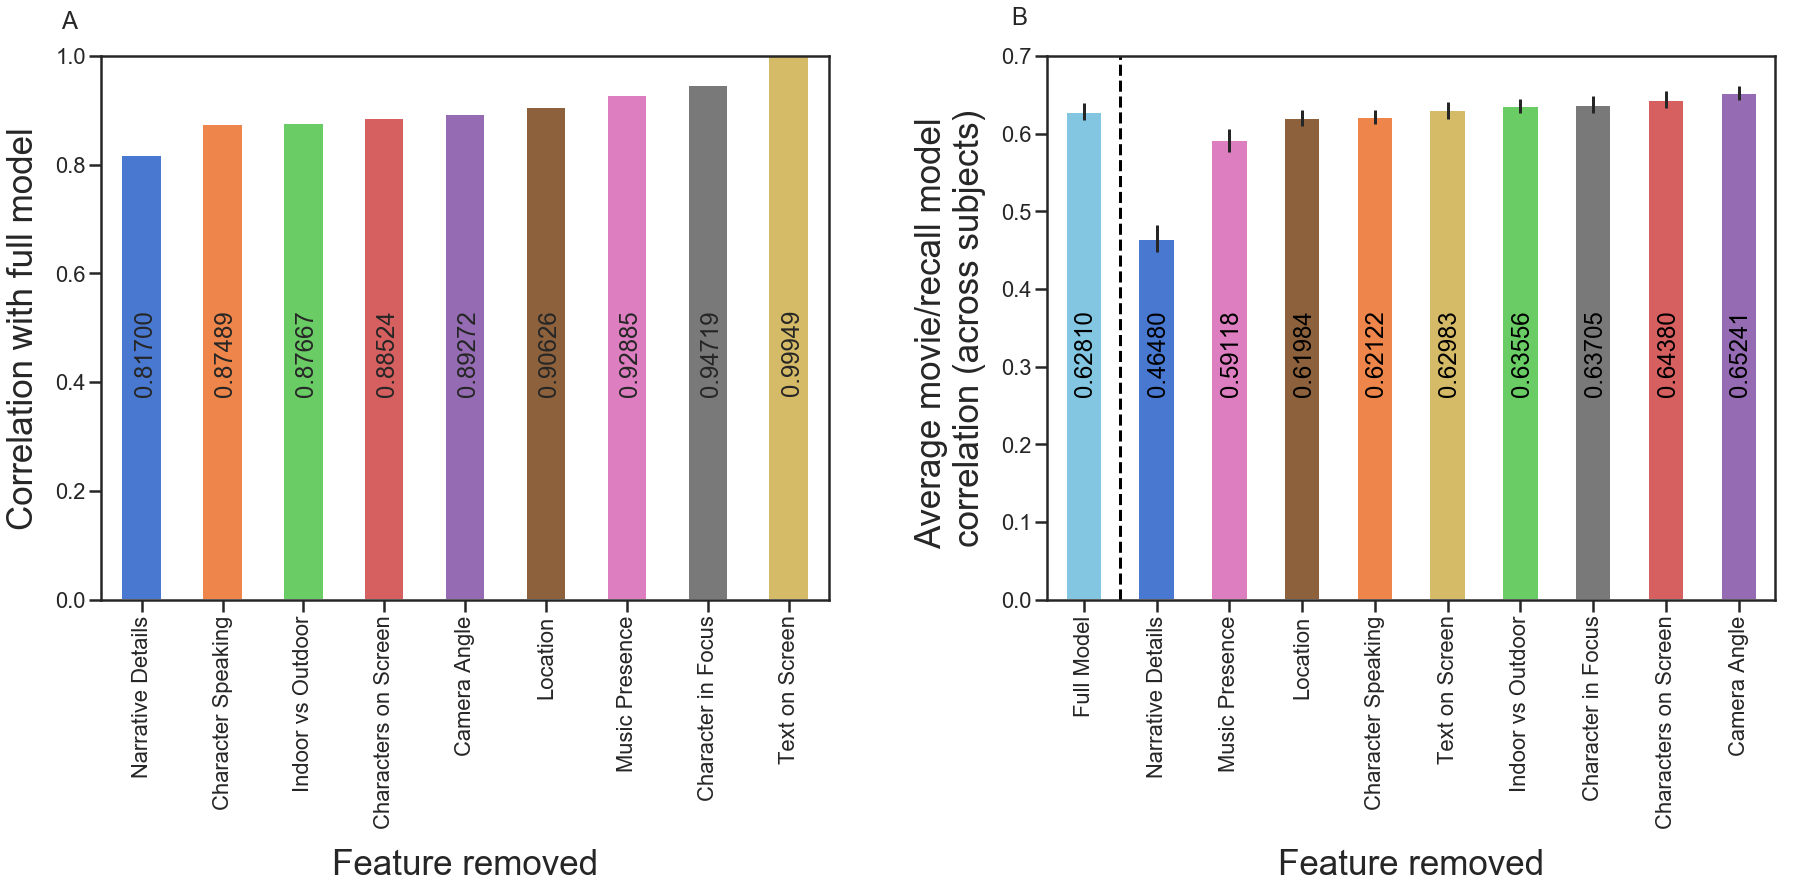

In [130]:
sns.set_palette('muted')
fig, axes = plt.subplots(1,2)
fig.set_size_inches(30, 10)
plt.subplots_adjust(wspace=.3)

# subplot A
m_m_series_ord = pd.Series(movie_model_corrs).sort_values()
m_m_series_ord.plot(ax=axes[0], kind='bar', ylim=[0,1])
axes[0].text(-1, 1.05, 'A')

for idx, corr in enumerate(m_m_series_ord.values):
    axes[0].text(idx-.1, 0.5, '%.5f'%corr, rotation='vertical')

axes[0].set_ylabel('Correlation with full model', size=35, labelpad=15)
axes[0].set_xlabel('Feature removed', size=35, labelpad=20)

# subplot B
# desired order of bars
m_r_model_order = ['Full Model','Narrative Details','Music Presence', 'Location','Character Speaking','Text on Screen',
                 'Indoor vs Outdoor','Character in Focus','Characters on Screen','Camera Angle']

m_r_series_ord = pd.Series(movie_recall_corrs).reindex(m_r_model_order)
m_r_series_ord.plot(ax=axes[1], kind='bar', ylim=[0,0.7], yerr=pd.Series(movie_recall_ses), 
                    color=['#82C6E2','#4878D0','#DC7EC0','#8C613C','#EE854A','#D5BB67','#6ACC64','#797979','#D65F5F',
                           '#956CB4']) # match bar color between plots

# visually separate full model from partials
plt.axvline(0.5, color='k', linestyle='dashed')

axes[1].text(-1, .74, 'B')
for idx, corr in enumerate(m_r_series_ord.values):
    axes[1].text(idx-.13, 0.35, '%.5f'%corr, rotation='vertical', color=text_color)

axes[1].set_ylabel('Average movie/recall model \ncorrelation (across subjects)', size=35, labelpad=15)
axes[1].set_xlabel('Feature removed', size=35, labelpad=20)

plt.savefig('../../paper/figs/5_feature_impact_analysis.pdf', bbox_inches='tight')

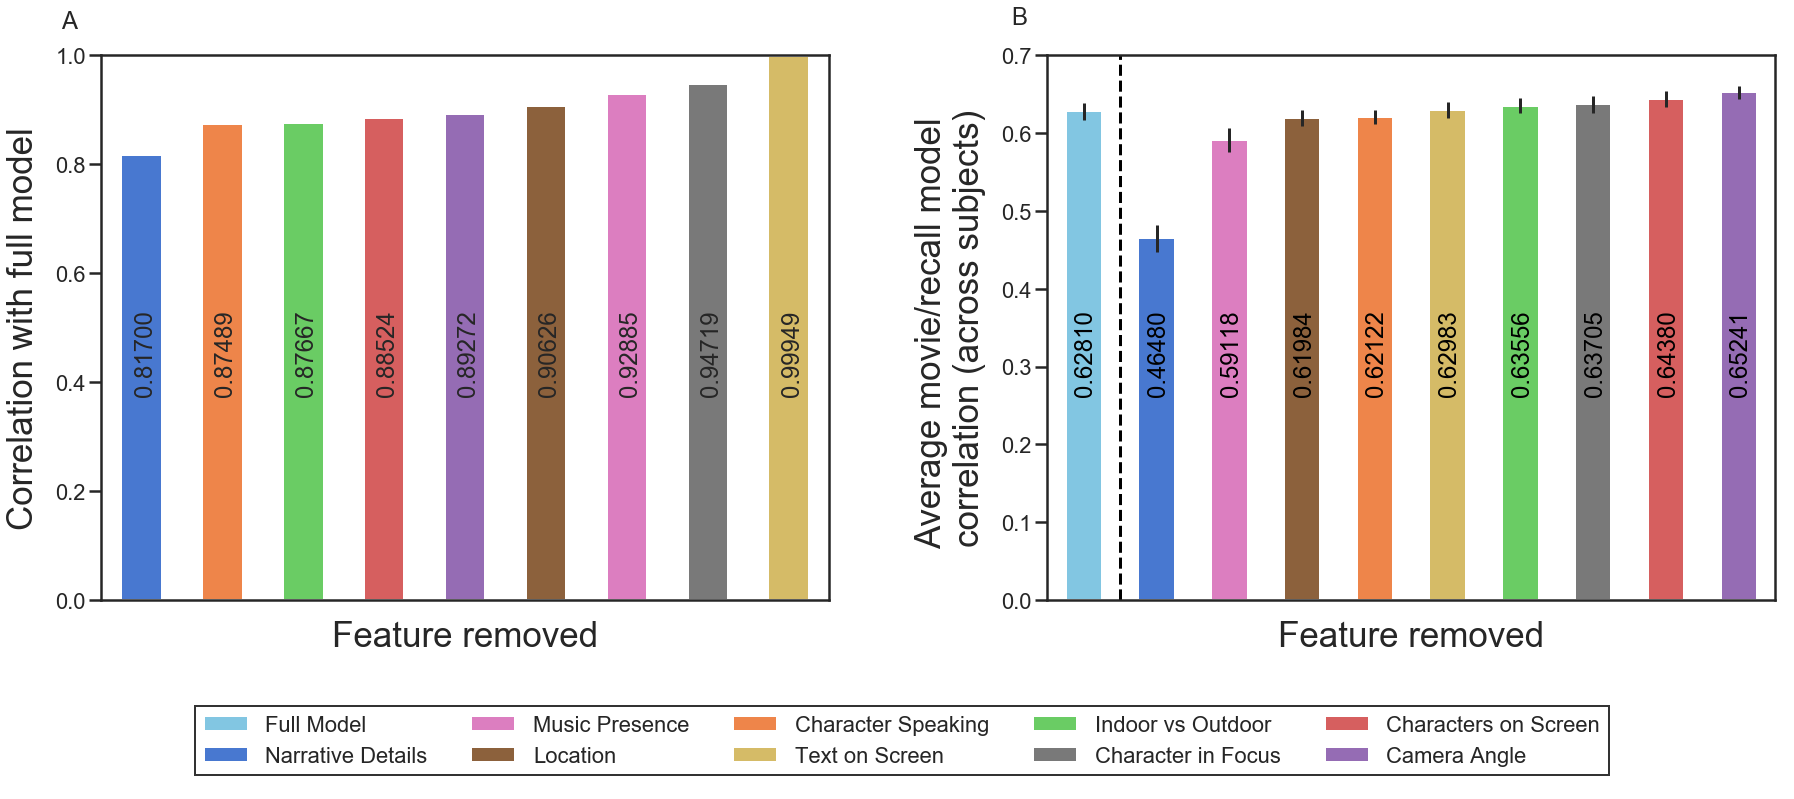

In [321]:
sns.set_palette('muted')
fig, axes = plt.subplots(1,2)
fig.set_size_inches(30, 12)
plt.subplots_adjust(wspace=.3, bottom=.25)

# subplot A
m_m_series_ord = pd.Series(movie_model_corrs).sort_values()
m_m_series_ord.plot(ax=axes[0], kind='bar', ylim=[0,1])
axes[0].text(-1, 1.05, 'A')
for idx, corr in enumerate(m_m_series_ord.values):
    axes[0].text(idx-.1, 0.5, '%.5f'%corr, rotation='vertical')
axes[0].set_ylabel('Correlation with full model', size=35, labelpad=15)
axes[0].set_xlabel('Feature removed', size=35, labelpad=20)


# subplot B
# desired order of bars
m_r_model_order = ['Full Model','Narrative Details','Music Presence', 'Location','Character Speaking',
                   'Text on Screen','Indoor vs Outdoor','Character in Focus','Characters on Screen','Camera Angle']

m_r_series_ord = pd.Series(movie_recall_corrs).reindex(m_r_model_order)
m_r_series_ord.plot(ax=axes[1], kind='bar', ylim=[0,0.7], yerr=pd.Series(movie_recall_ses), 
                    color=['#82C6E2','#4878D0','#DC7EC0','#8C613C','#EE854A','#D5BB67','#6ACC64','#797979','#D65F5F',
                           '#956CB4']) # match bar color between plots

# visually separate full model from partials
plt.axvline(0.5, color='k', linestyle='dashed')

axes[1].text(-1, .74, 'B')
for idx, corr in enumerate(m_r_series_ord.values):
    axes[1].text(idx-.13, 0.35, '%.5f'%corr, rotation='vertical', color=text_color)

axes[1].set_ylabel('Average movie/recall model \ncorrelation (across subjects)', size=35, labelpad=15)
axes[1].set_xlabel('Feature removed', size=35, labelpad=20)

# legend
for ax in axes:
    ax.xaxis.set_ticks([]) # remove ticks
handles = axes[1].get_legend_handles_labels()[0][0]
labels = m_r_model_order
fig.legend(handles, labels, ncol=5, bbox_to_anchor=(.75, .12), edgecolor='k', fancybox=False)

plt.savefig('../../paper/figs/5_feature_impact_analysis_leg.pdf', bbox_inches='tight')

** Figure n: Impact of individual features on topic modeling analysis.** A). By-feature contribution to model structure. Bars represent the similarity (correlation) of a video model trained in the absence of a given feature to the model trained on all features. B). By-feature contribution to video model/recall model relationship. The leftmost bar represents the across-subjects mean correlation between the video model and recall models trained on all features. Subsequent bars represent the same relationship between video and recall models trained in the absence of a given feature. Error bars are the standard error of the mean across subjects.

**0.2.n &nbsp;&nbsp;&nbsp; Quantifying the imporance of various features** 

To determine the contribution of each feature to the structure of the video model, we examined the similarity between the temporal structure of models trained in the absence of a single feature and that of our original model. First, we iteratively removed one transcribed feature from the scene descriptions and constructed a timepoints (1976) by topis (100) matrix using a topic model fit to the remaining features (see **0.2.1**).  We then represented the new model's temporal structure as a timepoints (1976) by timepoints (1976) correlation matrix which we correlated to that of the original video model (Pearson's _r_). 

In order to ascertain which features were important to relating the recall models to the video model, we similarly compared to the temporal structures of video and recall models deprived of a single feature at a time. We transformed each subject's recall transcript (as described in **0.2.1**) using a model trained on the feature-deprived video text windows (of 50 scene segments), and resampled the recall timeseries to match the shape of the movie model (1976 timepoints). We then represented the temporal structures of each subject's recall model as timepoints (1976) by timepoints (1976) correlation matrices and computed its average correlation with the temporal structure of the video model (across subjects).